[View in Colaboratory](https://colab.research.google.com/github/upendra122/ML/blob/master/Gender_Classification.ipynb)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile
import io
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)






In [0]:

file_id = '1DkaG9MQt0k7vUNxBhjUjIYU74FZgm9No'
file_id.encode('utf-8').strip()
downloaded = drive.CreateFile({'id': file_id})


In [0]:
downloaded.GetContentFile('wiki5.csv.zip')

In [5]:
!unzip wiki5.csv.zip -d gender_data

Archive:  wiki5.csv.zip
  inflating: gender_data/wiki5.csv   


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl
import cv2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm

In [0]:
data=pd.read_csv('gender_data/wiki5.csv')

In [0]:
arr=np.array(data)

In [0]:
label=np.array(data['gender'])

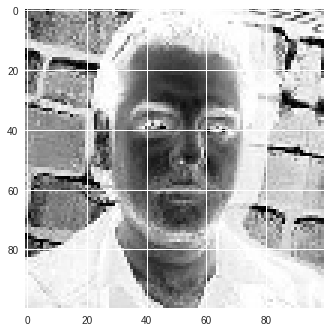

In [11]:
label=label[:3208]
a=np.zeros((3208,10000))
for i in range(0,3208):
    m=0
    for j in range(3,10003):
        a[i][m]=arr[i][j]
        m+=1

In [0]:

images=a

In [0]:
images_flat = np.array([i.reshape((10000,))for i in images])
x_train,x_test,y_train,y_test= train_test_split(images_flat,label,test_size=0.3,
                                                random_state=0)

In [14]:
pca=PCA(n_components=600)
pca.fit(x_train)
x_train_= pca.transform(x_train)
pca=PCA(n_components=600)
pca.fit(x_test)
x_test_= pca.transform(x_test)
clf=svm.SVC()
clf.fit(x_train_,y_train)
prediction=clf.predict(x_test_)
pred_labels = prediction == y_test
acc=0.0
for i in pred_labels:
    if i==True:
        acc+=1
print ('SVM accuracy=',(acc)/len(pred_labels)*100,'%')

SVM accuracy= 57.52855659397716 %
